In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 加载数据

In [2]:
df = pd.read_csv('../data/美国华盛顿地区共享单车使用量数据集.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011/1/1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011/1/2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011/1/3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011/1/4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011/1/5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## 属性之间的关系热力图

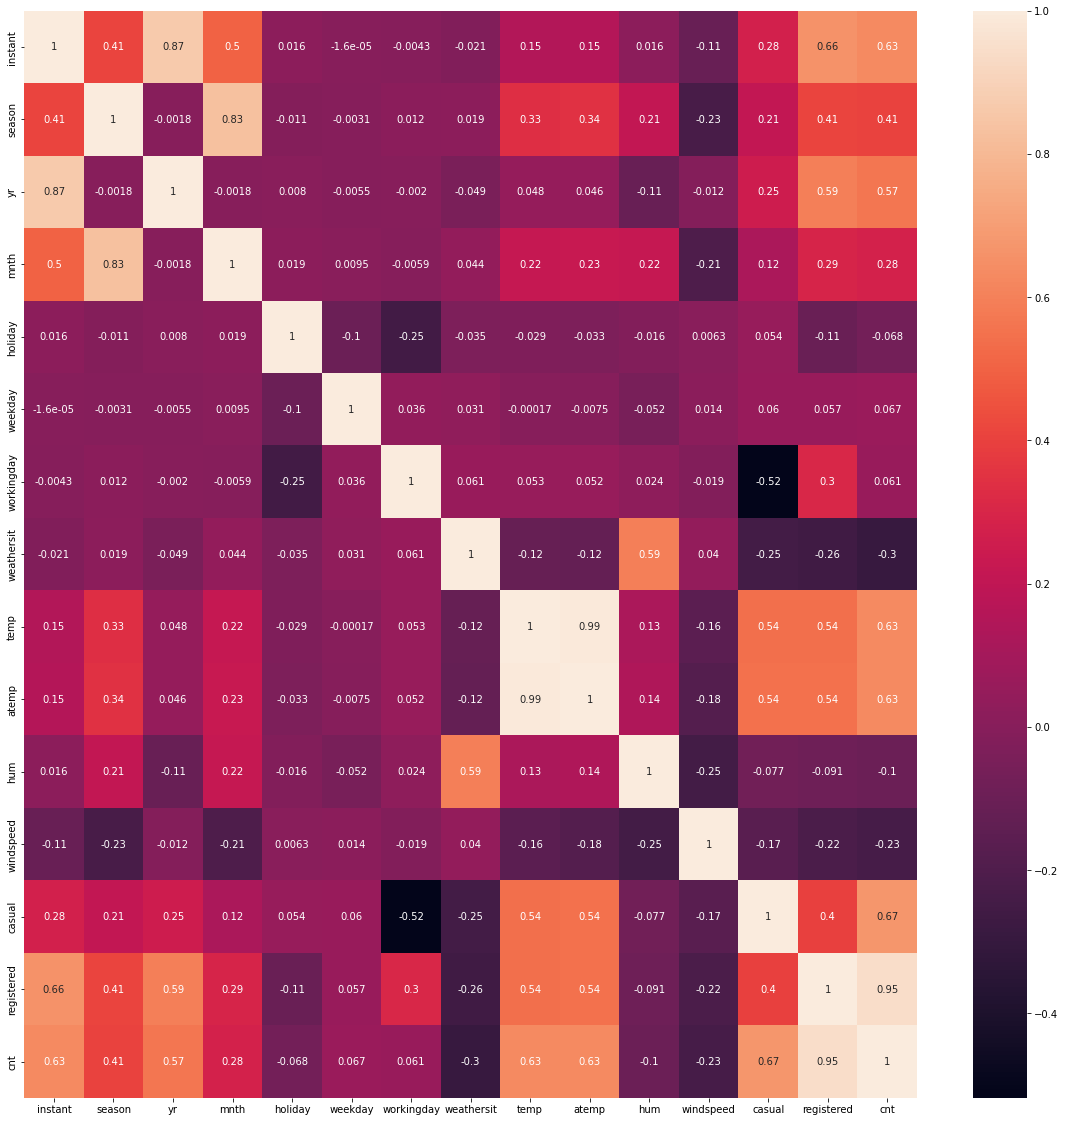

In [3]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, ax=ax)
plt.show()

## 特征提取

In [4]:
features = ["season","yr","mnth","holiday","weekday","workingday","weathersit","temp","hum","windspeed", "casual", "registered"]

X = df[features]
y = df["cnt"]

## 训练模型

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [7]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

pred = rf.predict(X_val)

rf.score(X_val, y_val)

0.9975747827340894

## 预测

In [8]:
dataFramePredict = pd.DataFrame(pred , index = y_val.index)

dataFramePredict

,0
609,5900.03
348,3758.21
153,5316.31
264,4878.96
325,1651.75
...,...
632,7475.07
559,7451.76
397,3800.85
627,7662.76


In [9]:
idx = np.sort(y_val.index)

idx

array([  0,   3,   8,  16,  23,  28,  31,  34,  36,  40,  44,  46,  58,
        70,  75,  79,  81,  86,  93, 105, 111, 112, 114, 118, 121, 126,
       127, 128, 129, 133, 135, 138, 140, 145, 149, 151, 153, 154, 161,
       167, 170, 178, 179, 181, 187, 188, 189, 190, 192, 197, 198, 206,
       209, 210, 218, 220, 224, 227, 230, 245, 260, 264, 267, 278, 281,
       290, 300, 302, 312, 315, 317, 321, 324, 325, 337, 346, 348, 351,
       358, 365, 368, 390, 396, 397, 398, 402, 403, 407, 408, 416, 418,
       431, 435, 443, 447, 450, 451, 452, 456, 464, 465, 469, 473, 479,
       481, 482, 483, 484, 488, 493, 497, 499, 536, 539, 541, 542, 559,
       572, 574, 581, 599, 604, 609, 612, 615, 616, 624, 627, 632, 635,
       642, 643, 651, 657, 658, 663, 678, 680, 682, 685, 694, 699, 701,
       702, 708, 720, 728])

In [10]:
y_true = y_val[idx]
y_pred = dataFramePredict[0][idx]

y_true, y_pred

(0       985
 3      1562
 8       822
 16     1000
 23     1416
        ... 
 701    4649
 702    6234
 708    3228
 720    3623
 728    1341
 Name: cnt, Length: 147, dtype: int64,
 0       862.37
 3      1583.68
 8       821.44
 16     1018.12
 23     1413.32
         ...   
 701    4647.57
 702    6346.26
 708    3225.58
 720    3595.77
 728    1433.88
 Name: 0, Length: 147, dtype: float64)

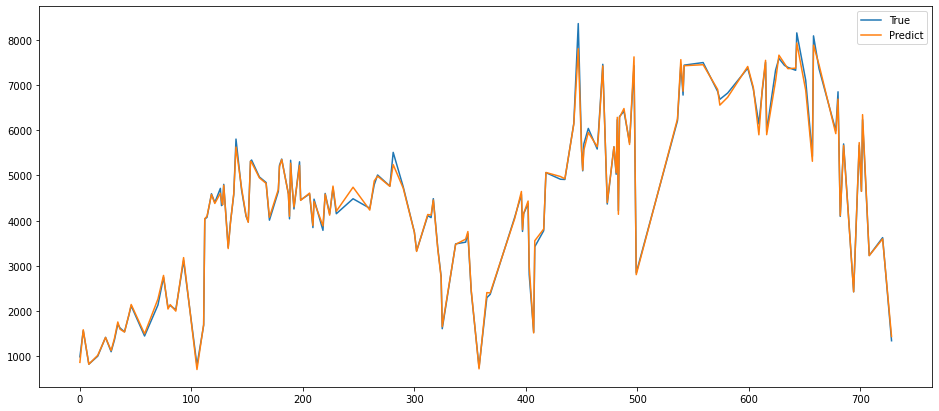

In [11]:
plt.figure(figsize = (16, 7))
plt.plot(idx, y_true, label = "True")
plt.plot(idx, y_pred, label = "Predict")
plt.legend()
plt.show()